0.9998437499999984
2.9973437499999847
4.972343750000002
6.917343750000072
7.017343750000071


C:\Users\jackr\AppData\Local\Temp\ipykernel_22460\1063184570.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


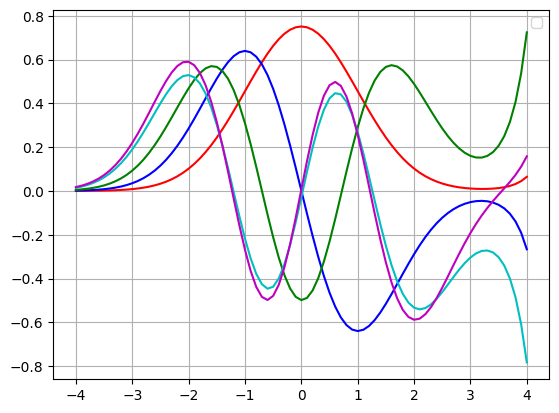

In [59]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ODE system
def shoot2(phi, x, eps):
    return [phi[1], (x**2 - eps) * phi[0]]

# Parameters
tol = 1e-4  # tolerance level for eigenvalue convergence
col = ['r', 'b', 'g', 'c', 'm', 'k']  # colors for plotting eigenfunctions
eps0 = 0.75  # initial eigenvalue guess

xp = [-4, 4]  # domain boundaries (L = 4)
xshoot = np.arange(xp[0], xp[1]+0.1, 0.1)  # spatial grid

eps_start = eps0  # starting value of beta (initial guess for eigenvalue)

eigenfunc_matrix = []
eigenvalues = []

# Begin mode loop to find and plot the first 5 eigenfunctions
for modes in range(1, 6):
    eps = eps_start  # initial eigenvalue guess for the current mode
    deps = eps0 / 100  # step size for adjusting beta during shooting

    #A = np.sqrt(16-eps) # initial value for eigenfunction at x=0
    phi0 = [np.exp(np.sqrt(16-eps)*(-4)), np.sqrt(16-eps) * np.exp(np.sqrt(16-eps) * (-4))]  # boundary conditions (phi(-4) = exp(sqrt(16-e)*x), dphi(0)/dx = A)

    for _ in range(1000):  # convergence loop for shooting method
        y = odeint(shoot2, phi0, xshoot, args=(eps,))  # solve ODE
        
        if abs(y[-1, 0] - 0) < tol:  # check if solution converged
            print(eps)  # eigenvalue found
            eigenvalues.append(eps)
            break

        # Adjust beta based on the sign of the solution at the boundary
        if (-1) ** (modes) * y[-1, 0] < 0:
            eps += deps  # Decrease beta if under
        else:
            eps -= deps  # Increase beta and reduce step size
            deps /= 2
    eps_start = eps + 0.1  # update beta for next mode
    # Normalize the eigenfunction
    norm = np.trapz(y[:, 0]**2, xshoot)
    eigenfunc_matrix.append(np.abs(y[:, 0] / np.sqrt(norm)))
    plt.plot(xshoot, y[:, 0] / np.sqrt(norm), col[modes - 1])  # plot eigenfunction

# Plot results
plt.legend()
plt.grid(True)
plt.show()
A1 = np.array(eigenfunc_matrix).T
A2 = np.array(eigenvalues)